## FFT tutorial

* represent time domain with multiple frequency domains

In [3]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size' : 24
       }

# set the figure attributes
# ** means the variable length is variable
plt.rc('font',**font)

In [6]:
sr = 256 # sample rate in HZ
f = 10
tmax = 2 # in seconds
dt = 1/sr
t = np.arange(0,tmax,dt)
sw = np.sin(2*pi*f*t) # a sin wave

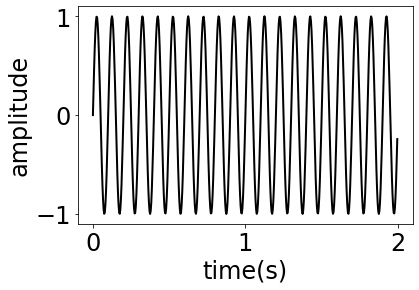

In [11]:
plt.plot(t,sw,'k-',linewidth = 2)
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.show()

In [13]:
print(sw.shape)

(512,)


In [14]:
sp = np.fft.rfft(sw) # real valued fft
print(sp.shape) 
# rfft reduced the size by half (reduce the negative frequencies, 
# ones that are not in the real domain. b/c the positive and negative signals are symmetric)
# fft.fft keeps both the negative and positive and yields shape=512

(257,)


In [15]:
sp[3] # j indicates imaginary plane

(1.1739570341808622e-14+3.6883949352083814e-15j)

In [22]:
amp = np.abs(sp) # square root (distance from origin)

# normalize the amp by the length of the signal (the longer the signal, the higher correlation(sum))
amp = (amp/len(sw)) * 2 # because we eliminated the negative domain in previous step


In [23]:
f_steps2 = 1/tmax
f_steps = np.fft.rfftfreq(sw.size,dt)
print(f_steps2,f_steps[1]-f_steps[0])

0.5 0.5


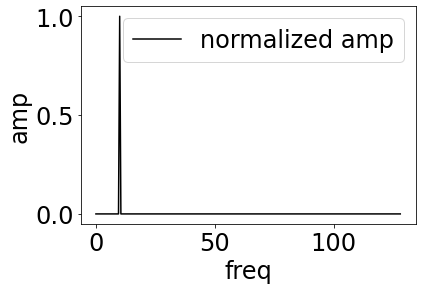

In [26]:
plt.plot(f_steps,amp,'k')
plt.legend(['normalized amp'],loc='upper right')
plt.xlabel('freq') # frequency domain
plt.ylabel('amp')
plt.show()

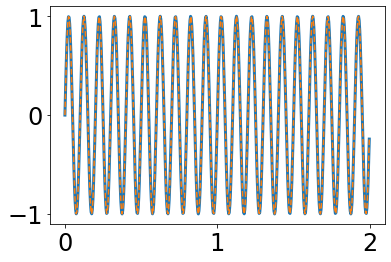

In [32]:
isp = np.fft.irfft(sp) # inverse the fft
plt.plot(t,isp,linewidth = 3)
plt.plot(t,sw,'--')
# can reverse exactly

### A more complex signal

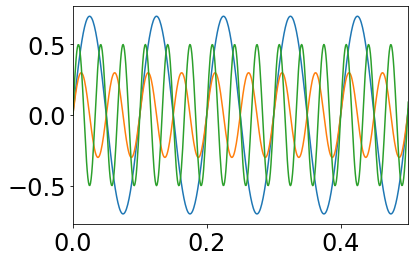

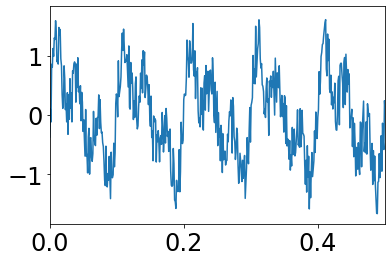

In [47]:
sr = 1024
f = np.array([10,20,30])
amp = np.array([.7,.3,.5])
tmax = 2

dt = 1/sr
t = np.arange(0,tmax,dt)
noise_amp = 1

sw = np.zeros((sr*tmax))

for i in range(len(amp)):
    sw += amp[i]*np.sin(2*pi*f[i]*t)
    plt.plot(t,amp[i]*np.sin(2*pi*f[i]*t))
plt.xlim(0,.5)
plt.show()
sw += (np.random.rand(len(sw))-0.5)*noise_amp
plt.plot(t,sw)
plt.xlim(0,.5)
plt.show()

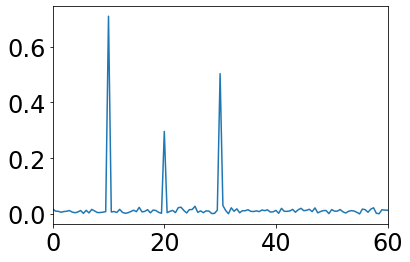

In [49]:
sp = np.fft.rfft(sw)
amp = (np.abs(sp)/len(sw))*2
freq_steps = np.fft.rfftfreq(len(sw),dt)

plt.plot(freq_steps,amp)
plt.xlim(0,60)
plt.show()

### frequency domain resolution = SR(sampling rate)/N(number=SR*T) = 1/T(durations of the data collection)

* The higher the sampling rate (SR) is, the more requencies we are able to recover
* The SR should be at least twice as high as the freq we want to recover (see figures)
  eg: to recover a 10 hz signal, we need at least 20 hz SR (sr >> f)